In [48]:
import re
import glob
import codecs
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import utils
import pickle
from sklearn.model_selection import train_test_split,GridSearchCV

np.random.seed(100)

# Import Data

In [49]:
import pickle
# load preprocessed data
with open('enron_email.df', 'rb') as handle:
    data = pickle.load(handle)

# split
X = data['Text']
Y = data['Class']

In [50]:
Y.value_counts()

1    17171
0    16545
Name: Class, dtype: int64

# CountVectorizer

In [4]:
# Original data shape
print('Original data shape:',X.shape)

Original data shape: (33716,)


In [5]:
# convert to binary matrix, english stopwords
binary_vectorizer = CountVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=None)
X_bin = binary_vectorizer.fit_transform(X)

In [6]:
# vocab_size
print('vocab_size:',len(binary_vectorizer.vocabulary_))

vocab_size: 2019272


In [7]:
# converted data shape
# number of emails * vocab_size
print('CountVectorizer Transformed data shape:',X_bin.shape)

CountVectorizer Transformed data shape: (33716, 2019272)


In [8]:
X.head(5)

0    just to update you on this project  s status :...
1    the above referenced meters need to be placed ...
2     see attached file : hpll 228 . xls  hpll 228 ...
3    daren it  s in .bob                      forwa...
4    daren fyi .bob                      forwarded ...
Name: Text, dtype: object

In [9]:
pd.DataFrame(X_bin[:5].toarray())

,0,1,2,3,4,5,6,7,8,9,...,2019262,2019263,2019264,2019265,2019266,2019267,2019268,2019269,2019270,2019271
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:

# split test train
X_train, X_test, Y_train, Y_test = train_test_split(X_bin, Y, train_size=.75)

# Use Full Features
### Logistic Regression

# Feature Selections
#### Logistic Regression

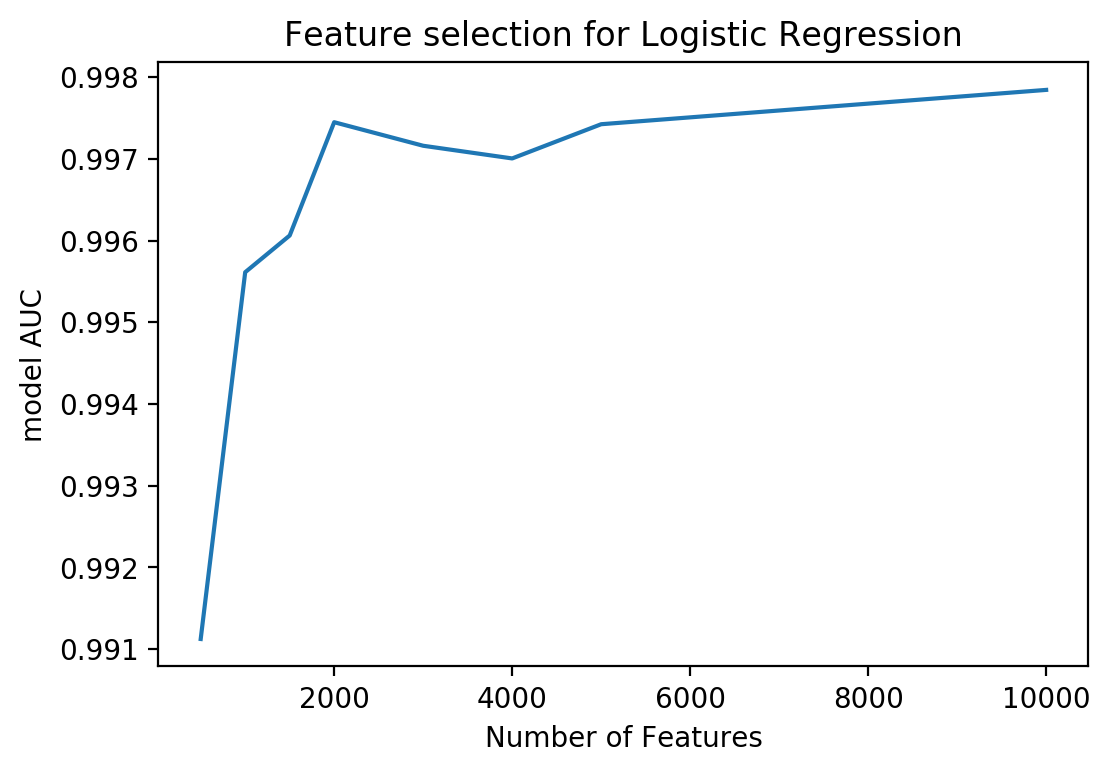

In [12]:
roc_labels = []
for k in [500,1000,1500,2000,3000,4000,5000,10000]:
    # feature selection by max_features
    binary_vectorizer = CountVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=k)
    X_bin = binary_vectorizer.fit_transform(X)
    # split test train
    X_train, X_test, Y_train, Y_test = train_test_split(X_bin, Y, train_size=.75)

    #train model
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    roc_label=auc(fpr,tpr)
    roc_labels.append(roc_label)
fig = plt.figure(dpi=200)
plt.xlabel("Number of Features")
plt.ylabel("model AUC")
plt.title('Feature selection for Logistic Regression')
plt.plot([500,1000,1500,2000,3000,4000,5000,10000],roc_labels)

#### Naive Bayes

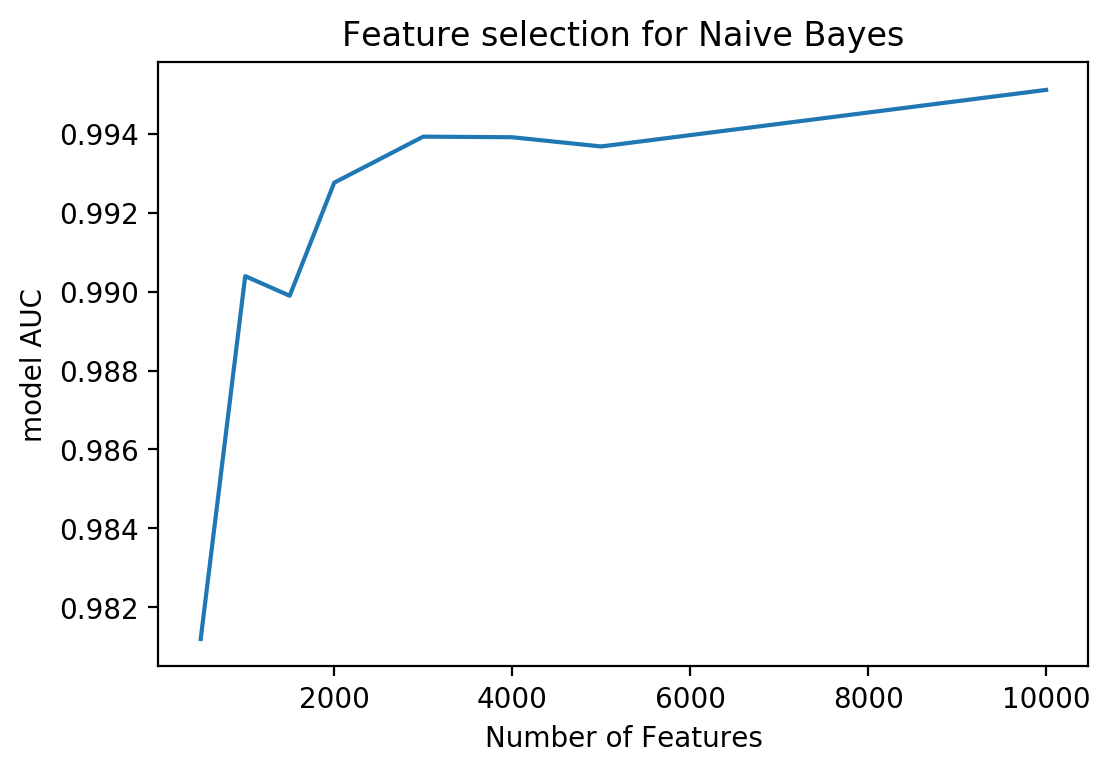

In [13]:
roc_labels = []
for k in [500,1000,1500,2000,3000,4000,5000,10000]:
    # feature selection by max_features
    binary_vectorizer = CountVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=k)
    X_bin = binary_vectorizer.fit_transform(X)
    # split test train
    X_train, X_test, Y_train, Y_test = train_test_split(X_bin, Y, train_size=.75)
    
    #train model
    model = BernoulliNB()
    model.fit(X_train, Y_train)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    roc_label=auc(fpr,tpr)
    roc_labels.append(roc_label)
fig = plt.figure(dpi=200)
plt.xlabel("Number of Features")
plt.ylabel("model AUC")
plt.title('Feature selection for Naive Bayes')
plt.plot([500,1000,1500,2000,3000,4000,5000,10000],roc_labels)

#### Random Forest

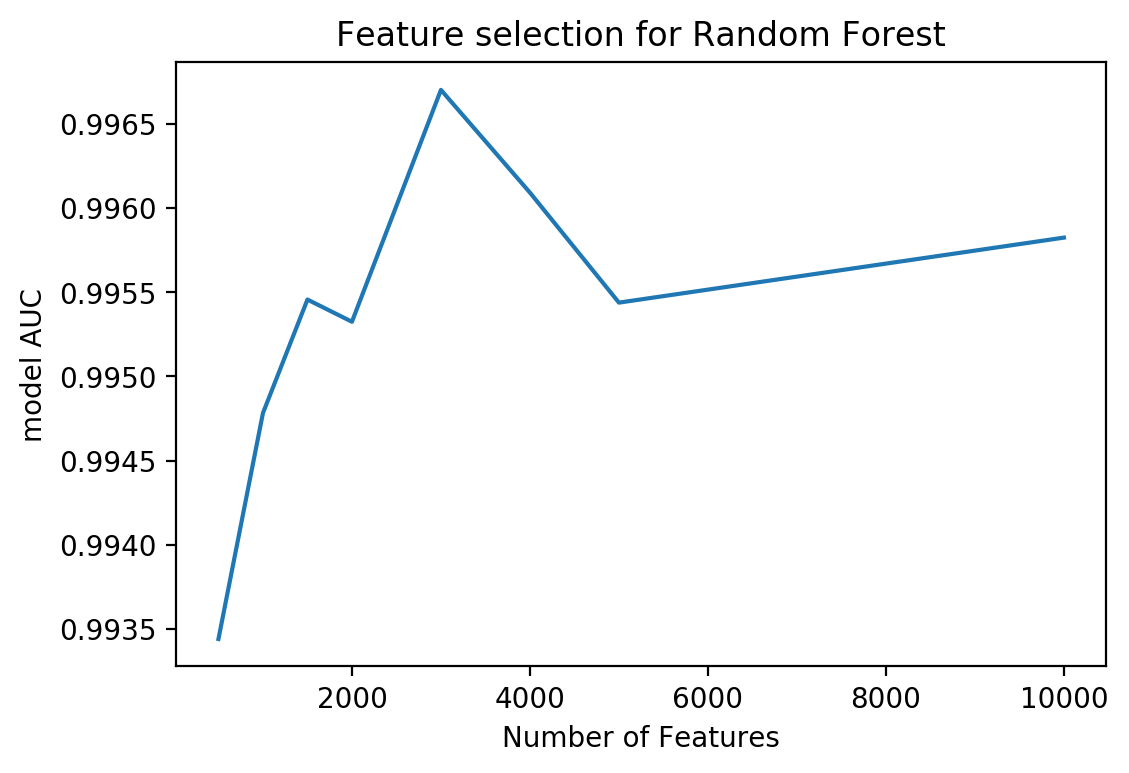

In [14]:
roc_labels = []
for k in [500,1000,1500,2000,3000,4000,5000,10000]:
    binary_vectorizer = CountVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=k)
    X_bin = binary_vectorizer.fit_transform(X)
    # split test train
    X_train, X_test, Y_train, Y_test = train_test_split(X_bin, Y, train_size=.75)
    
    model = RandomForestClassifier(n_estimators = 100) 
    model = model.fit( X_train, Y_train )
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    roc_label=auc(fpr,tpr)
    roc_labels.append(roc_label)
fig = plt.figure(dpi=200)
plt.xlabel("Number of Features")
plt.ylabel("model AUC")
plt.title('Feature selection for Random Forest')
plt.plot([500,1000,1500,2000,3000,4000,5000,10000],roc_labels)

#### Decision Tree

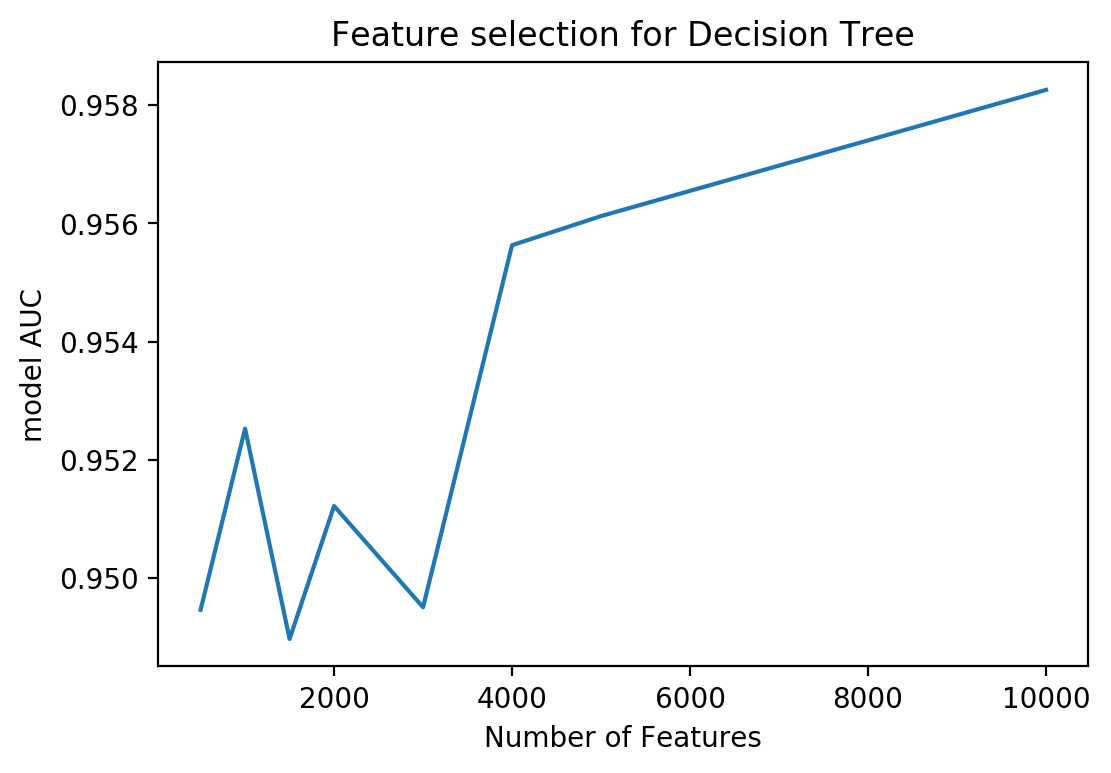

In [15]:
roc_labels = []
for k in [500,1000,1500,2000,3000,4000,5000,10000]:
    binary_vectorizer = CountVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=k)
    X_bin = binary_vectorizer.fit_transform(X)
    # split test train
    X_train, X_test, Y_train, Y_test = train_test_split(X_bin, Y, train_size=.75)
    
    model = tree.DecisionTreeClassifier()
    model = model.fit( X_train, Y_train )
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    roc_label=auc(fpr,tpr)
    roc_labels.append(roc_label)
fig = plt.figure(dpi=200)
plt.xlabel("Number of Features")
plt.ylabel("model AUC")
plt.title('Feature selection for Decision Tree')
plt.plot([500,1000,1500,2000,3000,4000,5000,10000],roc_labels)

# Final Model
#### Logistics Regression

In [212]:
# convert to binary matrix, english stopwords
binary_vectorizer = CountVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=30000)
X_bin = binary_vectorizer.fit_transform(X)
# split test train
X_train, X_test, Y_train, Y_test = train_test_split(X_bin, Y, train_size=.75)

model = LogisticRegression()
model.fit(X_train, Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
# convert to binary matrix, english stopwords
binary_vectorizer = CountVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=30000)
X_bin = binary_vectorizer.fit_transform(X)
# split test train
X_train, X_test, Y_train, Y_test = train_test_split(X_bin, Y, train_size=.75)

# Train Logistic Model
model = LogisticRegression()
# grid search for the best fit parameters
parameters = {
    'C': [0.001, 0.01, 0.1,1,10],
    'penalty': ['l2']
}

model = GridSearchCV(estimator=model, param_grid = parameters, cv=3, scoring='precision')
model.fit(X_train, Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

#### Naive Bayes

In [18]:
NB = BernoulliNB()
NB.fit(X_train, Y_train)
# print AUC curve
#pred = NB.predict_proba(X_test_features_b)[:,1]
#utils.plotAUC(Y_test, pred, 'Naive Bayes, Features = 600')

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#### Random Forest

In [168]:
# convert to binary matrix, english stopwords
binary_vectorizer = CountVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=30000)
X_bin = binary_vectorizer.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_bin, Y, train_size=.75)
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( X_train, Y_train )
# print AUC curve
#pred = forest.predict_proba(X_test_features_b)[:,1]
#utils.plotAUC(Y_test, pred, 'Random Forest, Features = 600')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [169]:
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Decision Tree

In [20]:
# convert to binary matrix, english stopwords
binary_vectorizer = CountVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=20000)
X_bin = binary_vectorizer.fit_transform(X)
# split test train
X_train, X_test, Y_train, Y_test = train_test_split(X_bin, Y, train_size=.75)

clf = tree.DecisionTreeClassifier()
clf = clf.fit( X_train, Y_train )
# print AUC curve
#pred = clf.predict_proba(X_test_features_b)[:,1]
#utils.plotAUC(Y_test, pred, 'Decision Tree, Features = 600')

# Plot AUC

In [23]:
tprs, fprs, roc_labels = utils.gather_auc(X_test, Y_test, model, NB, clf, forest)

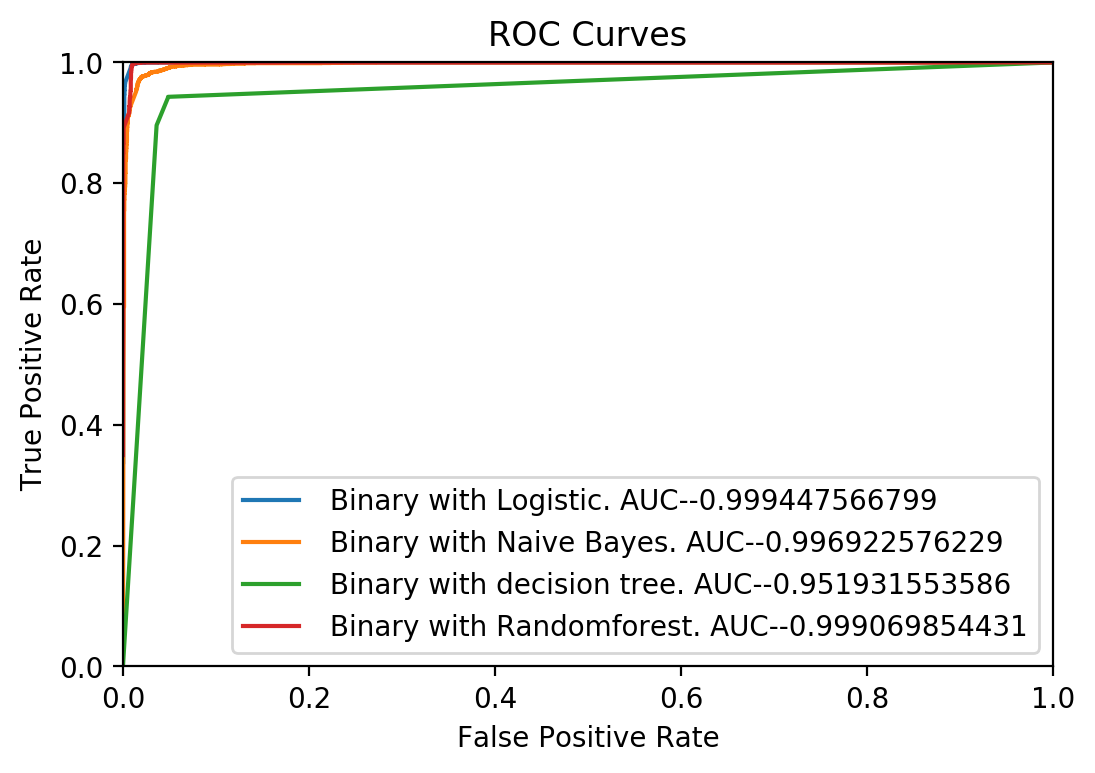

In [42]:
#utils.plot_auc_together(tprs, fprs, roc_labels)
def plot_auc_together(tprs, fprs, roc_labels):
    #plt.rcParams['figure.figsize'] = 12, 12
    fig = plt.figure(dpi=200)
    for fpr, tpr, roc_label in zip(fprs, tprs, roc_labels):
        plt.plot(fpr, tpr, label=roc_label)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend(loc=4)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
              
plot_auc_together(tprs, fprs, roc_labels)

(92.101353254684568, 0.48999999999999999)

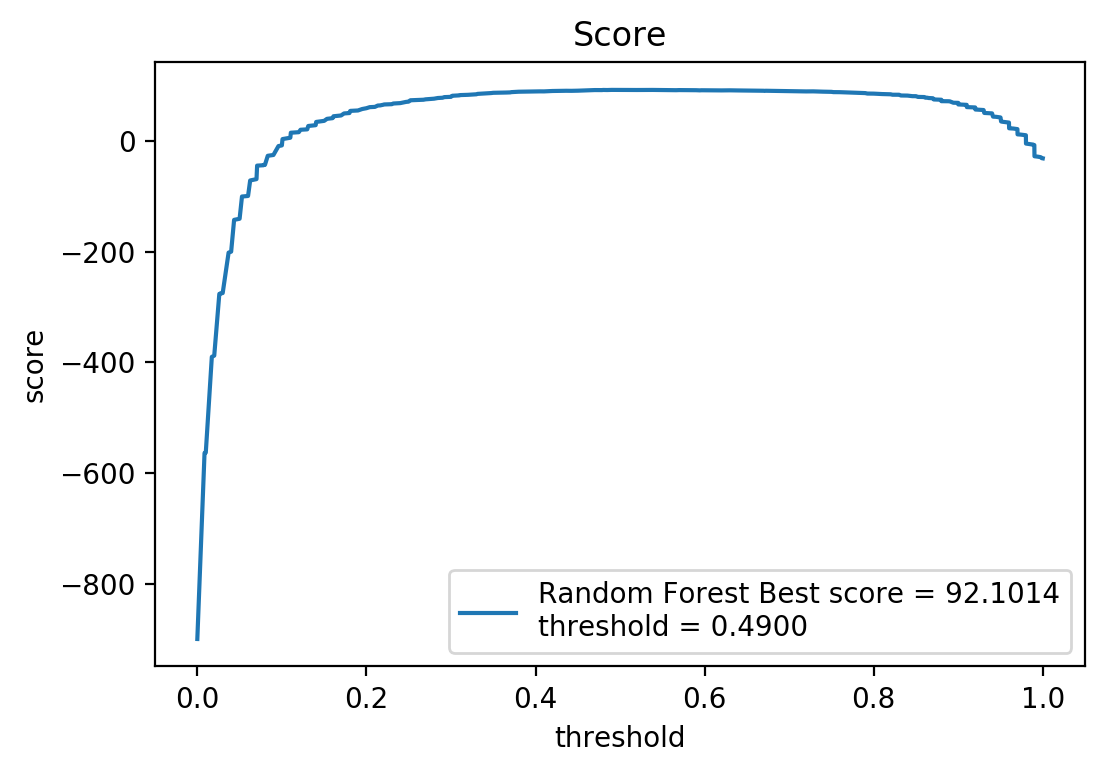

In [211]:
pred = forest.predict_proba(X_test)[:,1]
utils.plotScore(Y_test, pred, 'Random Forest')

In [209]:
utils.confusion_mtx(Y_test, pred, best_threshold = 0.49)

,POS(Truth),Neg(Truth)
POS(Pred),0.992934,0.007066
Neg(Pred),0.004162,0.995838


In [210]:
utils.confusion_mtx(Y_test, pred, best_threshold = 0.50)

,POS(Truth),Neg(Truth)
POS(Pred),0.992934,0.007066
Neg(Pred),0.004393,0.995607


In [207]:
with open('logreg.model', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('logreg.model', 'rb') as handle:
    model = pickle.load(handle)

In [198]:
with open('binary_vectorizer.pk', 'wb') as handle:
    pickle.dump(binary_vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('binary_vectorizer.pk', 'rb') as handle:
    binary_vectorizer = pickle.load(handle)